In [1]:
import underworld3 as uw
#from underworld3.systems import Stokes
from underworld3 import function

import numpy as np
import sympy
import os

import os
import h5py   

import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pyvista as pv
import glob
from underworld3.cython.petsc_discretisation import petsc_dm_find_labeled_points_local

ModuleNotFoundError: No module named 'underworld3'

In [2]:
from underworld import UWGeodynamics as GEO
from underworld import visualisation as vis
import underworld as uw

import underworld.function as fn
import math
import numpy as np
import os
import h5py  

import matplotlib.pyplot as plt
import matplotlib.patches as patches

loaded rc file /home/nl/env_uw2/lib/python3.11/site-packages/underworld-2.15.1b0-py3.11-linux-x86_64.egg/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [3]:
u = uw.scaling.units
ndim = uw.scaling.non_dimensionalise
dim = uw.scaling.dimensionalise

H = 700.  * u.kilometer
velocity = 1.0 * u.centimeter / u.year
#g    =   10.0 * u.meter / u.second**2  
#bodyforce    = 3300  * u.kilogram / u.metre**3 * g 
mu           = 1e21  * u.pascal * u.second

KL = H
Kt = KL / velocity
KM = mu * KL * Kt

scaling_coefficients = uw.scaling.get_coefficients()
scaling_coefficients["[length]"] = KL
scaling_coefficients["[time]"] = Kt
scaling_coefficients["[mass]"]= KM

In [4]:
scaling_t = 1/ndim(1*u.kiloyear)
scaling_h = 1/ndim(1*u.kilometer)

In [5]:
KL = 700
dt0,maxstep0,dstep0,= 0.5,201,2
times0 = np.arange(0,dt0*maxstep0+dt0*dstep0/2,dt0*dstep0)

gamma = -0.2139e-11
h_init = 7
tao = 1000*365.25*24*3600
h_analytic = h_init*np.exp(gamma*times0*tao)

t_relax = 14.825

In [6]:
# from petsc4py import PETSc
# comm = PETSc.COMM_WORLD

# def find_topwall_max(outputPath,load_step):
#     filename = outputPath + f'_step_{load_step:05d}.h5'
#     viewer = PETSc.ViewerHDF5().create(filename, "r", comm=comm)
#     h5plex = PETSc.DMPlex().create(comm=comm)
#     sf0 = h5plex.topologyLoad(viewer)
#     h5plex.coordinatesLoad(viewer, sf0)
#     h5plex.labelsLoad(viewer, sf0)

#     cdim = 2
#     dm = h5plex
#     topwall = petsc_dm_find_labeled_points_local(dm,"Top")
#     coord_vec = dm.getCoordinatesLocal()
#     coords = coord_vec.array.reshape(-1, cdim)
    
# #     def find_ind(value):
# #         topwall_x = coords[topwall,0]
# #         idx = np.abs(topwall_x-value).argmin()
# #         return idx
# #     idx = find_ind(0)
# #     topwallmid_Ind = topwall[idx] 
    
#     return coords[topwall,1].max()

In [14]:
ElementType_name = ["Q1dQ0","Q2dQ0","Q2Q1","Q2dQ1","Q3Q1","Q3dQ1","Q3Q2","Q3dQ2"]
ElementType_set = [np.array([1,0, 'False']),
                   np.array([2,0, 'False']),
                   np.array([2,1, 'True']),
                   np.array([2,1, 'False']),
                   np.array([3,1, 'True']),
                   np.array([3,1, 'False']),
                   np.array([3,2, 'True']),
                   np.array([3,2, 'False'])]

In [15]:
# dt1,maxstep1,dstep1,= 0.5,200,2
# times1 = np.arange(0,dt1*maxstep1+dt1*dstep1/2,dt1*dstep1)
# steps = np.linspace(0,maxstep1,int(maxstep1/2+1))

In [16]:
# test_res   = [128, 256]
# test_eletype = [0, 1, 2, 3]
test_res   = [140,280]
test_eletype = [0,1] #,4]
test_linstype = ["-","--","-.","."]

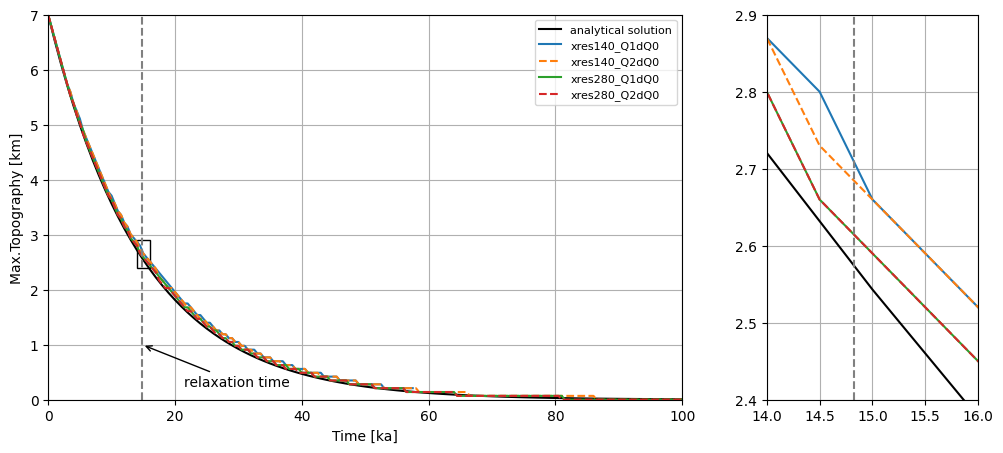

In [17]:
rc_x1 = 14
rc_x2 = 16
rc_w = rc_x2-rc_x1
rc_y1 = 2.4
rc_y2 = 2.9
rc_h = rc_y2-rc_y1


fname = "Maximum topography of Case 1 over time"+ ".png"
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5),gridspec_kw={'width_ratios': [3, 1]})
ax1.set(xlabel='Time [ka]', ylabel='Max.Topography [km]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)
ax1.plot(times0,h_analytic,'k',label= "analytical solution")
for res in test_res:
    for i, eletype in enumerate(test_eletype):
        xres = int(res)
        ElementType_case = int(eletype)
        fname_txt = f'op_Crameri2012Case1_xres{xres}_{ElementType_name[ElementType_case]}/ParticlePosition.txt'
        data = np.loadtxt(fname_txt)
        t1 = data[:,0]*scaling_t
        w1 = data[:,1]*scaling_h-700
        ax1.plot(t1,w1,test_linstype[i],label= f'xres{xres}_{ElementType_name[ElementType_case]}') 
ax1.axvline(x=t_relax,color="grey",linestyle="--")               
ax1.legend(loc = 'upper right',prop = {'size':8})
ax1.set_xlim([0,100]) 
ax1.set_ylim([0,7]) 
ax1.add_patch(patches.Rectangle((rc_x1,rc_y1),rc_w,rc_h,fill=False,edgecolor='k'))
#ax1.text(1,0.5,'relaxation time')
ax1.annotate(r'relaxation time', xy=(t_relax,1),xytext=(+30,-30),textcoords='offset points',xycoords='data',arrowprops=dict(arrowstyle='->'))
ax1.grid()

#ax2.set(xlabel='Time [ka]', ylabel='Max.Topography [km]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)
ax2.plot(times0,h_analytic,'k',label= "analytical solution")
for res in test_res:
    for i, eletype in enumerate(test_eletype):
        xres = int(res)
        ElementType_case = int(eletype)
        fname_txt = f'op_Crameri2012Case1_xres{xres}_{ElementType_name[ElementType_case]}/ParticlePosition.txt'
        data = np.loadtxt(fname_txt)
        t1 = data[:,0]*scaling_t
        w1 = data[:,1]*scaling_h-700
        ax2.plot(t1,w1,test_linstype[i],label= f'xres{xres}_{ElementType_name[ElementType_case]}')  
ax2.axvline(x=t_relax,color="grey",linestyle="--")               
#ax2.legend(loc = 'upper right',prop = {'size':8})
ax2.set_xlim([rc_x1,rc_x2]) 
ax2.set_ylim([rc_y1,rc_y2]) 
ax2.grid()

plt.savefig(fname,dpi=150,bbox_inches='tight')

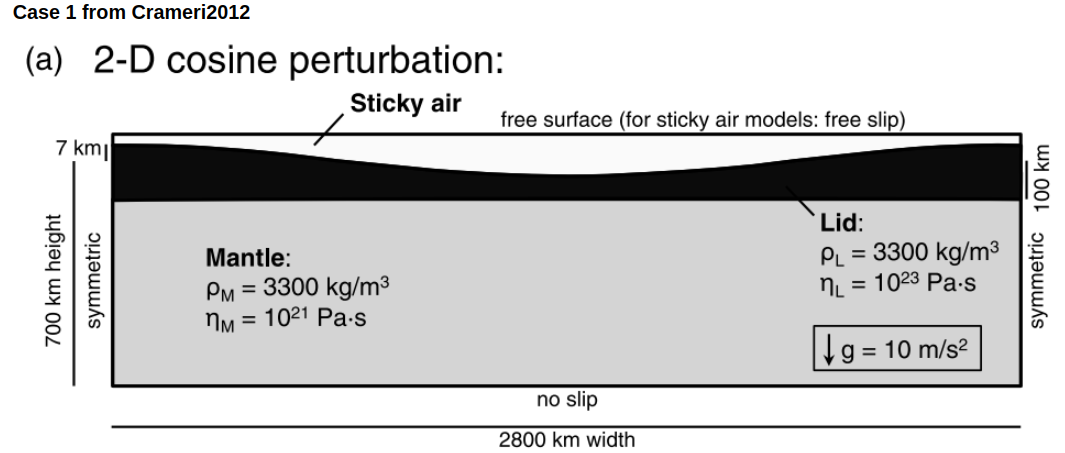

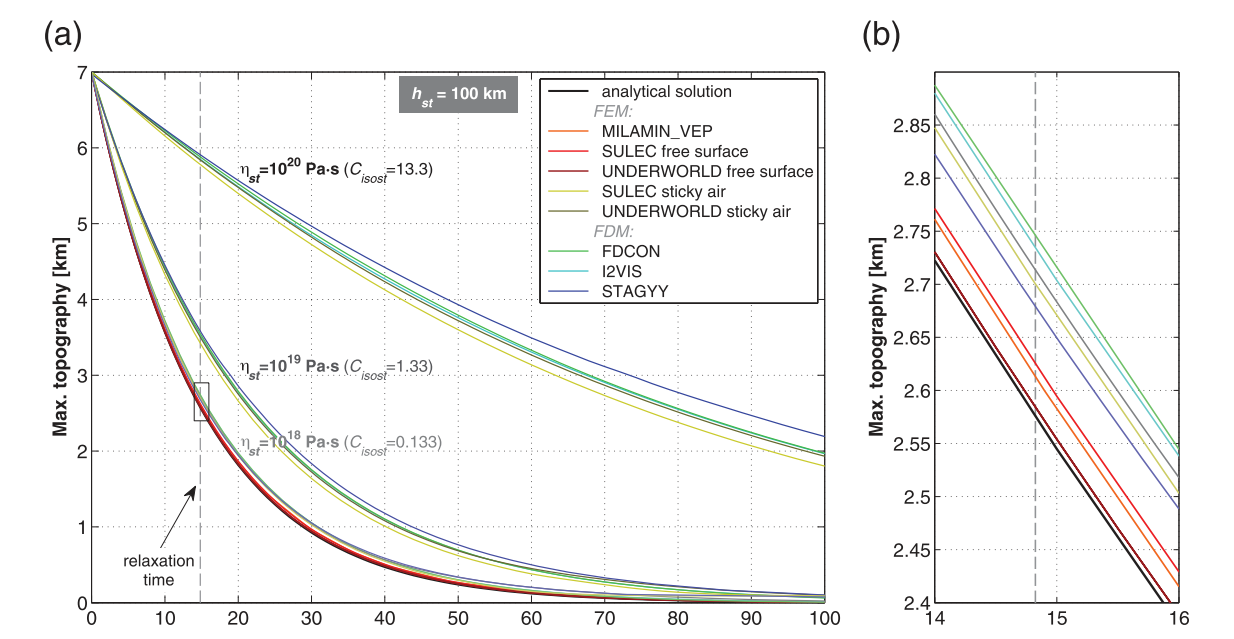